In [1]:
import cv2
from colorthief import ColorThief
import os 
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import numpy as np

In [20]:
path = r'C:\Users\Jalil\Desktop\PROJECTS\football-data-extraction\cropped_players'
points = []
for i, file in enumerate(os.listdir(path)):
    color_thief = ColorThief(os.path.join(path, file))
    dominant_color = color_thief.get_color(quality=1)
    palette_color = color_thief.get_palette(color_count=3)
    print(f'image: {i}, color : {[c for c in dominant_color]}, color_palette : {palette_color}')
    points.append(dominant_color)

    

image: 0, color : [114, 135, 75], color_palette : [(112, 133, 74), (209, 224, 184), (179, 198, 145), (180, 188, 164)]
image: 1, color : [135, 130, 103], color_palette : [(131, 127, 100), (217, 212, 207), (202, 128, 135), (186, 210, 148)]
image: 2, color : [112, 129, 75], color_palette : [(112, 129, 74), (39, 38, 30), (210, 225, 166), (164, 137, 142)]
image: 3, color : [124, 146, 86], color_palette : [(124, 146, 86), (227, 239, 205), (44, 52, 18), (188, 204, 172)]
image: 4, color : [132, 141, 100], color_palette : [(131, 141, 100), (244, 239, 226), (207, 205, 171), (101, 64, 64)]
image: 5, color : [114, 129, 82], color_palette : [(109, 124, 79), (31, 35, 26), (49, 62, 34), (212, 228, 184)]
image: 6, color : [126, 137, 93], color_palette : [(129, 139, 96), (232, 241, 210), (33, 30, 37), (162, 165, 181)]
image: 7, color : [132, 141, 108], color_palette : [(115, 124, 94), (221, 225, 204), (185, 197, 168), (186, 186, 172)]
image: 8, color : [111, 121, 81], color_palette : [(94, 101, 69), (1

In [18]:
idx = 1
x_vals = [point[0] for point in points]
y_vals = [point[1] for point in points]
z_vals = [point[2] for point in points]
print(x_vals)

[114, 135, 112, 124, 132, 114, 126, 132, 111, 113]


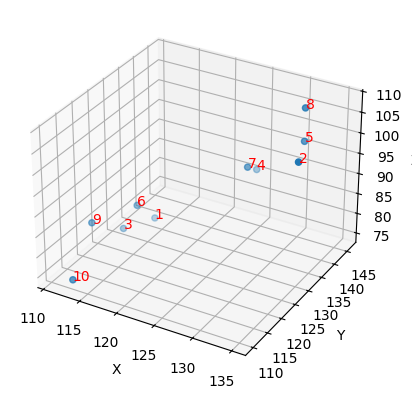

In [23]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x_vals, y_vals, z_vals, marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

for i, (x,y,z) in enumerate(points):
    ax.text(x, y, z, f'{i+1}', color='red')

In [53]:
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=0).fit(points)
print(kmeans.labels_)

[0 1 0 1 1 0 1 1 0 0]


# Methode moyenne

In [36]:
path = r'C:\Users\Jalil\Desktop\PROJECTS\football-data-extraction\cropped_players'
color_means = []


for file in os.listdir(path):
    image = plt.imread(os.path.join(path, file))
    sum_r = 0
    sum_g = 0
    sum_b = 0
    card = image.shape[0] * image.shape[1]
    for rows in image:
        for cols in rows:
            sum_r += cols[0]
            sum_g += cols[1]
            sum_b += cols[2]
    color_means.append((int(sum_r/card), int(sum_g/card), int(sum_b/card)))

for color in color_means:
    print(color)
    

(117, 137, 79)
(147, 141, 116)
(101, 115, 68)
(131, 152, 94)
(161, 165, 132)
(93, 106, 68)
(140, 149, 113)
(142, 148, 121)
(98, 106, 73)
(119, 108, 79)


In [37]:
x_vals = [color[0] for color in color_means]
y_vals = [color[1] for color in color_means]
z_vals = [color[2] for color in color_means]
print(x_vals)

[117, 147, 101, 131, 161, 93, 140, 142, 98, 119]


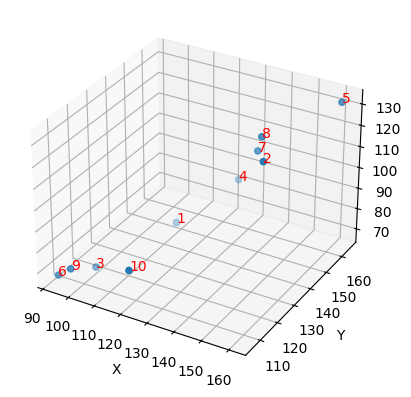

In [38]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x_vals, y_vals, z_vals, marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

for i, (x,y,z) in enumerate(color_means):
    ax.text(x, y, z, f'{i+1}', color='red')

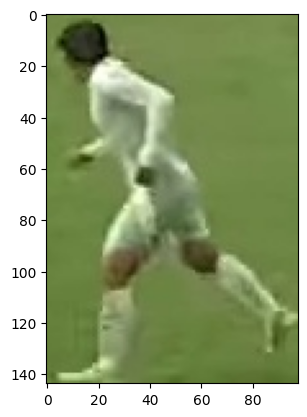

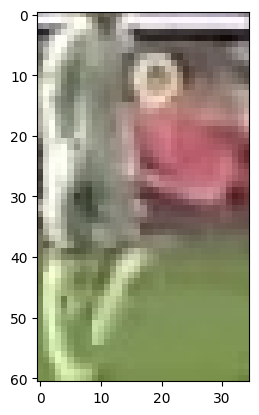

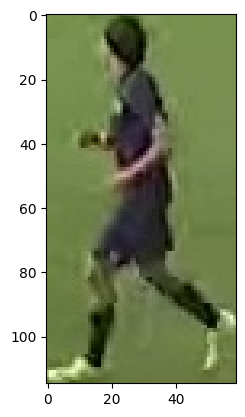

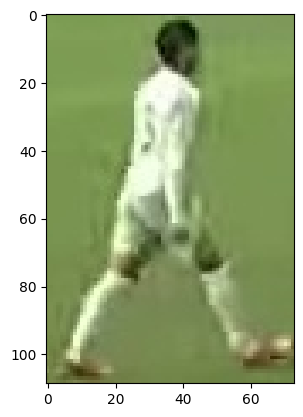

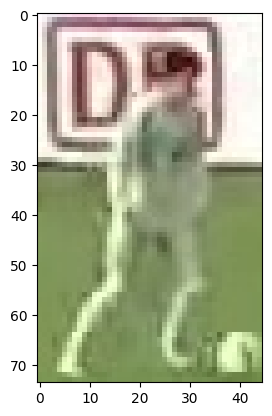

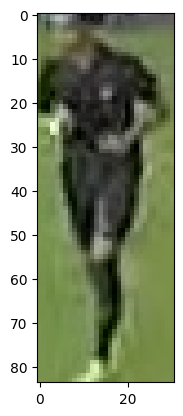

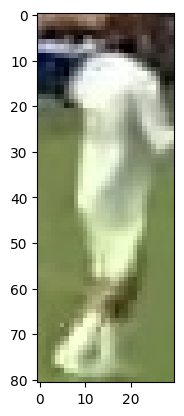

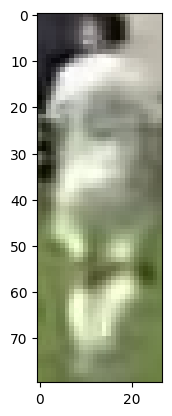

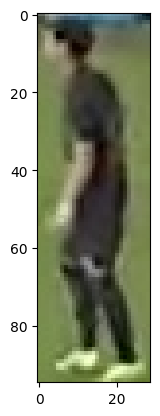

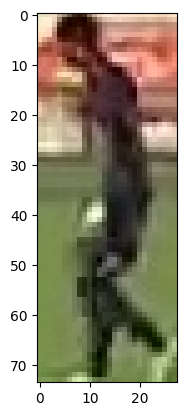

In [39]:
path = r'C:\Users\Jalil\Desktop\PROJECTS\football-data-extraction\cropped_players'
for file in os.listdir(path):
    img = plt.imread(os.path.join(path, file))
    plt.figure()
    plt.imshow(img)